In [1]:
import numpy as np
def strided_app(a, L, S):  
    '''
    Pandas rolling for numpy
    # Window len = L, Stride len/stepsize = S
    '''
    nrows = ((a.size - L) // S) + 1
    n = a.strides[0]
    return np.lib.stride_tricks.as_strided(a, shape=(nrows,L), strides=(S * n,n))

In [69]:
a = np.array([1,2,3,4,5,6])
print(a[0:5])
strided_app(a, 3, 1)

[1 2 3 4 5]


array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [11]:
strided_app(a, 6, 1)

array([[          1,           4,   835042326,   538970665,   539766875,
        -2147467488]])

In [42]:
strided_app(a, 3, 1)

array([[         4,          5,          0],
       [         5,          0, -735354336],
       [         0, -735354336, -735354336],
       [-735354336, -735354336, -730037280],
       [-735354336, -730037280,          2],
       [-730037280,          2,          8]])

In [41]:
np.full([3,2],np.nan)

array([[nan, nan],
       [nan, nan],
       [nan, nan]])

In [22]:
a = [4,3,2,1]
def inverse_num(series):
    # 因为numba不支持enumerate，所以后动计算逆序
    count = 0
    for i in range(len(series)-1):
        for j in range(i+1, len(series)):
            if series[i] > series[j]:
                count += 1
        i += 1
    return count

inverse_num(a)

6

In [40]:
a = np.array([[4,3,2,1],[5,6,7,8]])
a.strides
print('a.size {}'.format(a.size))
nrows = ((a.size - 4) // 2) + 1
print('nrows {}'.format(nrows))
print('window size 4, step 2')
n = a.strides[0]
b = np.lib.stride_tricks.as_strided(a, shape=(nrows,4), strides=(2 * n,n))
print(b)

a.size 8
nrows 3
window size 4, step 2
[[         4          5          0 -735354336]
 [         0 -735354336 -735354336 -730037280]
 [-735354336 -730037280          2          8]]


In [82]:
def slip_window_concat_array(origin_array: array, window: int = 5, step: int = 1):
    if len(origin_array) > window:
        new_array = origin_array[0:window]
        for i in range(1, len(origin_array)-window):
            slip_array = origin_array[i:i+window]
            new_array = np.vstack((new_array, slip_array))
    return new_array

a = np.array([1,2,3,4,5,6,7,8,9,10])

new_array=slip_window_concat_array(a)
new_array

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])

In [83]:
np.full(5, np.nan)

array([nan, nan, nan, nan, nan])

In [119]:
index = range(7)
for i in index:
    print(i)
def last_poly9(array_input):
        fit_params = np.polynomial.Chebyshev.fit(index, array_input, 9)
        print(fit_params)
        print(fit_params(index))
        return fit_params(index)[-1]
a = np.array([11,2,32,42,5.3,6,87,28,19,10.9])
new_array=slip_window_concat_array(a,window=7,step=1)

print(list(map(last_poly9,new_array)))

0
1
2
3
4
5
6
cheb([15.91380832  3.97955903 -2.93888045 13.20147243 21.86191664  1.44345089
  6.43888045  8.36046964  7.72427504 11.01504801])
[11.   2.  32.  42.   5.3  6.  87. ]
cheb([ 22.25788913   7.11355328 -10.95569722  -1.94936722 -22.24444342
 -12.41365192  15.80569722  14.73158757  10.13655429   5.51787828])
[ 2.  32.  42.   5.3  6.  87.  28. ]
cheb([ 23.67120837   5.15156854 -13.40025532 -14.06559075  -5.00525092
  17.3417684   23.15025532 -14.46045807  -2.91595746  -0.46728812])
[32.  42.   5.3  6.  87.  28.  19. ]
[87.00000000000006, 27.99999999999997, 18.99999999999999]


In [133]:
def strided_app(a, L, S):  
    '''
    Pandas rolling for numpy
    # Window len = L, Stride len/stepsize = S
    '''
    nrows = ((a.size - L) // S) + 1
    n = a.strides[0]
    return np.lib.stride_tricks.as_strided(a, shape=(nrows,L), strides=(S * n,n))

x = np.random.rand(100)

y=strided_app(x, 20, 5)

def last_poly(x,y,poly=9):
    fit_params = np.polynomial.Chebyshev.fit(x, y, poly)
    return fit_params(x)[-1]

In [136]:
def slip_window_concat_array(origin_array: np.array, window: int = 252, step: int = 1):
    new_array = origin_array[0:window]
    for i in range(step, len(origin_array)-window, step):
        slip_array = origin_array[i:i+window]
        new_array = np.vstack((new_array, slip_array))
    return new_array

a = np.array([1,2,3,4,5,6,7,8,9,10])
new_array=slip_window_concat_array(a)
new_array

In [157]:
a = np.array(range(1000))
new_array=slip_window_concat_array(a,step=5)
new_array

array([[  0,   1,   2, ..., 249, 250, 251],
       [  5,   6,   7, ..., 254, 255, 256],
       [ 10,  11,  12, ..., 259, 260, 261],
       ...,
       [735, 736, 737, ..., 984, 985, 986],
       [740, 741, 742, ..., 989, 990, 991],
       [745, 746, 747, ..., 994, 995, 996]])

In [158]:
nrow = np.size(new_array, axis=0)
print(nrow)
ncol = np.size(new_array, axis=1)
print(ncol)
index = range(ncol)
result = []
for i in range(nrow):
    result.append(last_poly(index, new_array[i, :]))
print(result)

150
252
[251.0000000000002, 256.0000000000002, 261.00000000000017, 266.0000000000002, 271.0000000000001, 276.00000000000017, 281.00000000000017, 286.0000000000002, 291.0000000000003, 296.0000000000002, 301.0000000000002, 306.0000000000002, 311.00000000000017, 316.0000000000001, 321.00000000000006, 326.00000000000017, 331.0000000000002, 336.00000000000017, 340.99999999999994, 346.0000000000001, 350.99999999999994, 356.0, 361.00000000000034, 366.0000000000001, 371.00000000000034, 376.0000000000004, 381.00000000000045, 386.0000000000001, 391.00000000000034, 395.99999999999994, 401.00000000000034, 406.0000000000004, 411.0000000000002, 416.0, 421.00000000000006, 425.9999999999999, 431.00000000000017, 436.0000000000001, 441.00000000000045, 445.99999999999983, 451.0, 456.00000000000006, 461.0, 466.0000000000003, 471.0000000000003, 475.99999999999994, 481.00000000000017, 486.00000000000034, 490.99999999999994, 496.00000000000017, 501.00000000000045, 506.0000000000002, 511.00000000000034, 516.0

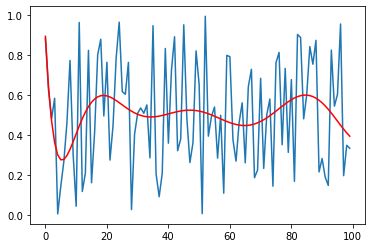

In [153]:
x=range(100)
y=np.random.rand(100)
p=np.polynomial.Chebyshev.fit(x, y, 9)
import matplotlib.pyplot as plt
y_fit_n=p(x)
plt.plot(x,y,'',x,y_fit_n,'r')